# Analyzing Relative Performance of Different DP Methods

## Activate Project and Import Functions

In [1]:
] activate ..

  Activating project at `~/Documents/Class/ThAlgs/Edist`


In [2]:
using Edist, BenchmarkTools
import Plots, Random

## Read FASTA Input Data

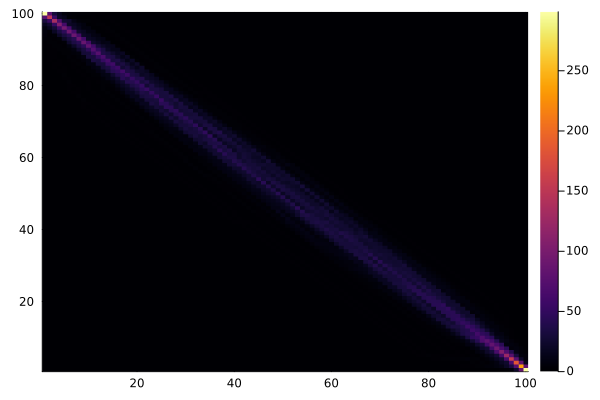

In [3]:
seq = get_fasta("../data/TP53_cross_species.fasta");
Full.visualize("../data/TP53_cross_species.fasta")

In [4]:
Plots.savefig("../data/graphics/solution_dist.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/solution_dist.png"

## Compare Running Time and Memory Usage

In [5]:
@benchmark score(Bounded, seq[1], seq[2])

BenchmarkTools.Trial: 268 samples with 1 evaluation.
 Range (min … max):  17.658 ms … 23.874 ms  ┊ GC (min … max): 0.00% … 4.02%
 Time  (median):     18.241 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   18.650 ms ±  1.104 ms  ┊ GC (mean ± σ):  1.85% ± 2.74%

    ▁▄█▇▄                                                      
  ▃▃██████▄▅▆▅▇▇▆▄▃▁▁▁▁▃▂▂▁▂▁▁▃▂▁▃▃▁▂▁▁▁▁▂▁▁▁▁▂▃▂▁▂▁▂▁▂▁▁▁▁▂▃ ▃
  17.7 ms         Histogram: frequency by time        22.9 ms <

 Memory estimate: 25.73 MiB, allocs estimate: 31.

In [6]:
@benchmark score(Full, seq[1], seq[2])

BenchmarkTools.Trial: 202 samples with 1 evaluation.
 Range (min … max):  21.509 ms … 34.296 ms  ┊ GC (min … max): 0.00% … 18.79%
 Time  (median):     23.642 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   24.848 ms ±  2.562 ms  ┊ GC (mean ± σ):  6.39% ±  8.28%

    ▁▃▄ █▇▂▁          ▂▄▂                                      
  ▃▁████████▅▃▃▄▃▃▃▃▄▃███▅▆▅▆▄▁▃▅▃▃▁▁▃▃▃▃▃▃▃▃▁▃▃▃▁▁▁▁▁▁▁▁▁▁▁▃ ▃
  21.5 ms         Histogram: frequency by time        34.2 ms <

 Memory estimate: 34.17 MiB, allocs estimate: 11.

In [7]:
@benchmark score(Hirschberg, seq[1], seq[2])

BenchmarkTools.Trial: 146 samples with 1 evaluation.
 Range (min … max):  33.072 ms … 41.319 ms  ┊ GC (min … max): 0.00% … 17.70%
 Time  (median):     33.861 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   34.339 ms ±  1.784 ms  ┊ GC (mean ± σ):  1.45% ±  4.53%

     ▂██▆                                                      
  ▄▁▄█████▆▄▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▂▁▃▃▃ ▂
  33.1 ms         Histogram: frequency by time        41.1 ms <

 Memory estimate: 4.73 MiB, allocs estimate: 81942.

In [8]:
sequences = Random.randstring.("AGCT", 10:100:10000);
queries   = Random.randstring.("AGCT", 20:100:10000);

In [9]:
memory = zeros(3, 100)
time   = zeros(3, 100)
error = zeros(1, 100)

for i in eachindex(sequences)
    ((exact, _, _, memory[1,i]), time[1,i], _, _, _) = @timed align(Full, sequences[i], queries[i])
    ((heuristic, _, _, memory[2,i]), time[2,i], _, _, _) = @timed align(Bounded, sequences[i], queries[i])
    (_, time[3,i], memory[3,i], _, _) = @timed align(Hirschberg, sequences[i], queries[i])

    error[i] = abs(heuristic - exact)/exact
end

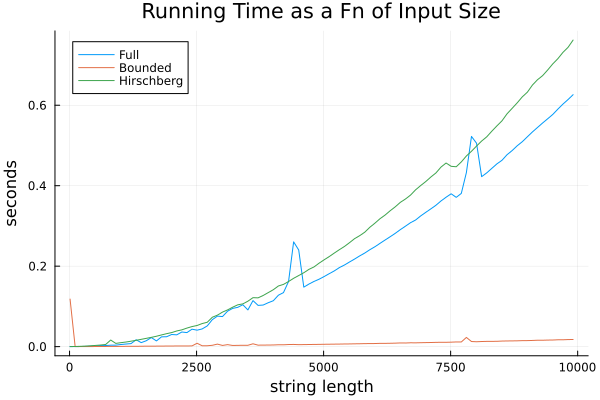

In [10]:
Plots.plot(10:100:10000, time',
           title = "Running Time as a Fn of Input Size", 
           xlabel = "string length", 
           ylabel="seconds", 
           label = ["Full" "Bounded" "Hirschberg"])

In [11]:
Plots.savefig("../data/graphics/running_time.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/running_time.png"

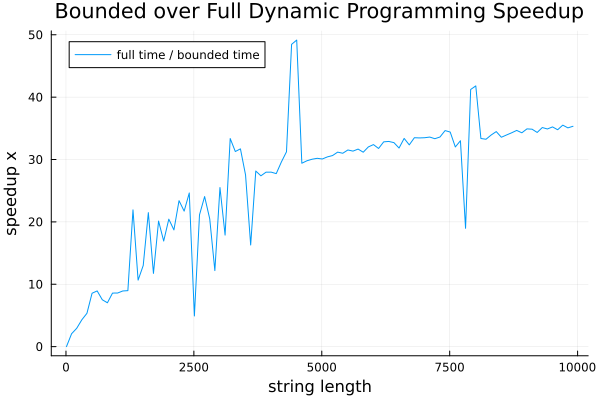

In [12]:
Plots.plot(10:100:10000, time[1,:]./time[2,:],
           title = "Bounded over Full Dynamic Programming Speedup",
           xlabel = "string length",
           ylabel = "speedup x",
           label = "full time / bounded time")

In [13]:
Plots.savefig("../data/graphics/speedup.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/speedup.png"

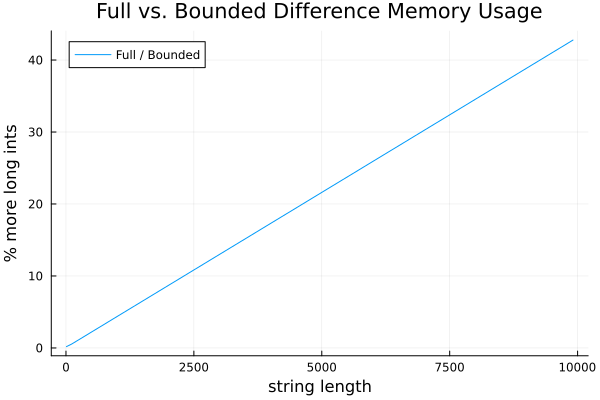

In [14]:
Plots.plot(10:100:10000, (memory[1,:] ./ memory[2,:])/8,
           title  = "Full vs. Bounded Difference Memory Usage",
           xlabel = "string length",
           ylabel = "% more long ints",
           label  = "Full / Bounded")

In [15]:
Plots.savefig("../data/graphics/mem_diff.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/mem_diff.png"

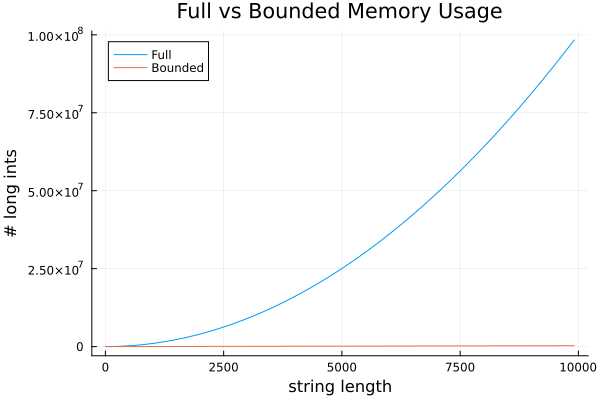

In [16]:
Plots.plot(10:100:10000, memory[1:2, :]'/8,
           title = "Full vs Bounded Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label = ["Full" "Bounded"])

In [17]:
Plots.savefig("../data/graphics/mem_both.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/mem_both.png"

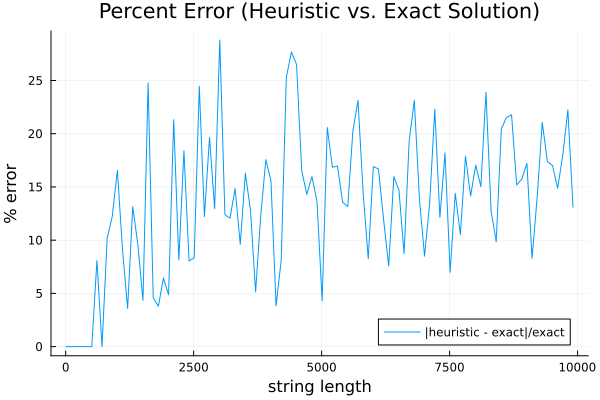

In [18]:
Plots.plot(10:100:10000, abs.(error') * 100,
           title = "Percent Error (Heuristic vs. Exact Solution)",
           xlabel = "string length",
           ylabel = "% error",
           label = "|heuristic - exact|/exact")

In [19]:
Plots.savefig("../data/graphics/error.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/error.png"